# In this notebook we will select randomly a specific number of tweets for each period depending on the bitcoin trend, in order to have a reduce and balanced dataset to work with

### Table below shows how many tweets per day we will take for each period

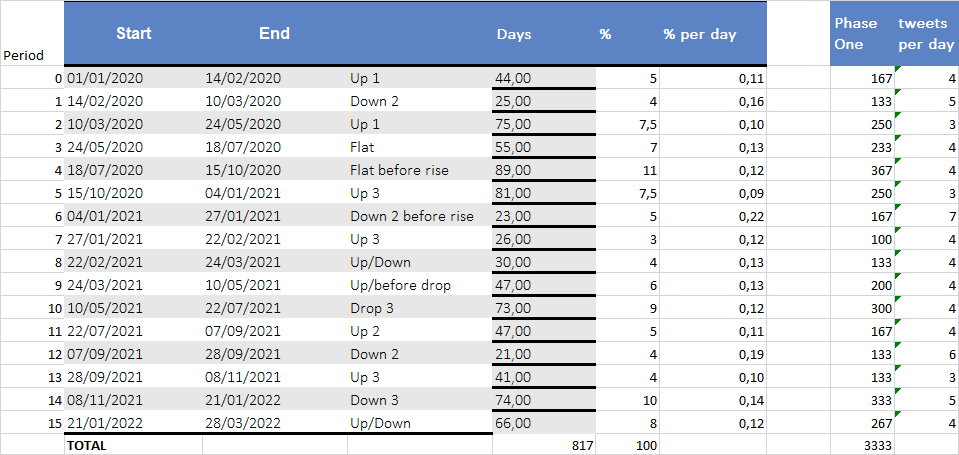

In [2]:
# Imports
import pandas as pd
import time
from tqdm import tqdm
from datetime import datetime

## LOAD/SAVE

In [3]:
# Export dataframe into a CSV
#tweets_df2.to_csv('text-query-tweets.csv', sep=',', index=False)
tweets_df = pd.read_csv('dataset_total_1_20_a_3_22.csv')

#selected_tweets_df.to_excel('first_selection_3285_tweets.xlsx', sep=',', index=False)

In [3]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861642 entries, 0 to 861641
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         861642 non-null  int64  
 1   Datetime           861642 non-null  object 
 2   Tweet Id           861642 non-null  int64  
 3   Text               861642 non-null  object 
 4   Username           861642 non-null  object 
 5   followersCount     861642 non-null  int64  
 6   friendsCount       861642 non-null  int64  
 7   replyCount         861642 non-null  int64  
 8   retweetCount       861642 non-null  int64  
 9   likeCount          861642 non-null  int64  
 10  quoteCount         861642 non-null  int64  
 11  retweetedTweetone  0 non-null       float64
 12  quotedTweet        90878 non-null   object 
 13  inReplyToTweetId   125485 non-null  float64
 14  inReplyToUser      125485 non-null  object 
 15  mentionedUsers     210356 non-null  object 
dtypes:

In [4]:
tweets_df['Datetime']= pd.to_datetime(tweets_df['Datetime'])

In [5]:
## function to get a column with the date and without the time

def extract_day(date):
    new_format_1 = date.strftime('%Y-%m-%d')
    return new_format_1

In [6]:
tweets_df["Day"] = tweets_df["Datetime"].apply(extract_day)

In [7]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861642 entries, 0 to 861641
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         861642 non-null  int64              
 1   Datetime           861642 non-null  datetime64[ns, UTC]
 2   Tweet Id           861642 non-null  int64              
 3   Text               861642 non-null  object             
 4   Username           861642 non-null  object             
 5   followersCount     861642 non-null  int64              
 6   friendsCount       861642 non-null  int64              
 7   replyCount         861642 non-null  int64              
 8   retweetCount       861642 non-null  int64              
 9   likeCount          861642 non-null  int64              
 10  quoteCount         861642 non-null  int64              
 11  retweetedTweetone  0 non-null       float64            
 12  quotedTweet        90878 non-n

In [8]:
# Tweets per day per period
tweets_per_day_0 = 4
tweets_per_day_1 = 5
tweets_per_day_2 = 3
tweets_per_day_3 = 4
tweets_per_day_4 = 4
tweets_per_day_5 = 3
tweets_per_day_6 = 7
tweets_per_day_7 = 4
tweets_per_day_8 = 4
tweets_per_day_9 = 4
tweets_per_day_10 = 4
tweets_per_day_11 = 4
tweets_per_day_12 = 6
tweets_per_day_13 = 3
tweets_per_day_14 = 5
tweets_per_day_15 = 4

tweets_per_day_list =[tweets_per_day_0
                      ,tweets_per_day_1
                      ,tweets_per_day_2
                      ,tweets_per_day_3
                      ,tweets_per_day_4
                      ,tweets_per_day_5
                      ,tweets_per_day_6
                      ,tweets_per_day_7
                      ,tweets_per_day_8
                      ,tweets_per_day_9
                      ,tweets_per_day_10
                      ,tweets_per_day_11
                      ,tweets_per_day_12
                      ,tweets_per_day_13
                      ,tweets_per_day_14
                      ,tweets_per_day_15]

In [9]:
# Add period column

list_dates= list(tweets_df['Day'])


In [10]:
list_periods=[]

for x in list_dates:
    if x >= "2022-01-21":
        list_periods.append(15)
    elif x >= "2021-11-08":
        list_periods.append(14)
    elif x >= "2021-09-28":
        list_periods.append(13)
    elif x >= "2021-09-07":
        list_periods.append(12)
    elif x >= "2021-07-22":
        list_periods.append(11)
    elif x >= "2021-05-10":
        list_periods.append(10)
    elif x >= "2021-03-24":
        list_periods.append(9)
    elif x >= "2021-02-22":
        list_periods.append(8)
    elif x >= "2021-01-27":
        list_periods.append(7)
    elif x >= "2021-01-04":
        list_periods.append(6)
    elif x >= "2020-10-15":
        list_periods.append(5)
    elif x >= "2020-07-18":
        list_periods.append(4)
    elif x >= "2020-05-24":
        list_periods.append(3)
    elif x >= "2020-03-10":
        list_periods.append(2)
    elif x >= "2020-02-14":
        list_periods.append(1)
    else:
        list_periods.append(0)
   

In [11]:
tweets_df['Period'] = list_periods

In [12]:
## function to iterate by days
from datetime import date, timedelta

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2020, 1, 1)
end_date = date(2022, 3, 29)

In [13]:
## first lets check we have enough tweets per day in every day
min_tweets_per_day = 1000000
max_tweets_per_day = 0
for single_date in daterange(start_date, end_date):
    mask = (tweets_df['Day'] == str(single_date))
    tweet_count = tweets_df.loc[mask].Day.count()    
    
    if tweet_count < min_tweets_per_day:
        min_tweets_per_day = tweet_count
    if tweet_count > max_tweets_per_day:
        max_tweets_per_day = tweet_count
    
print(min_tweets_per_day, max_tweets_per_day)  

320 7684


In [ ]:
periods = [0,
           1,
           2,
           3,
           4,
           5,
           6,
           7,
           8,
           9,
           10,
           11,
           12,
           13,
           14,
           15
]
selected_tweets_df = pd.DataFrame()

for period in tqdm(periods): # iter from 0 to 15
    mask_period = (tweets_df['Period'] == period)
    tweets_period_df = tweets_df.loc[mask_period]
    start_date_period =  datetime.strptime(tweets_period_df.Day.min(),('%Y-%m-%d'))
    end_date_period = datetime.strptime((datetime.strptime(tweets_period_df.Day.max(),'%Y-%m-%d') + timedelta(days=1)).strftime('%Y-%m-%d'),('%Y-%m-%d'))

    for single_date in daterange(start_date_period, end_date_period):
        mask_date = (tweets_df['Day'] == single_date.strftime('%Y-%m-%d'))
        tweets_day_df = tweets_df.loc[mask_date].sample(tweets_per_day_list[period]) # random tweets
        selected_tweets_df = pd.concat([selected_tweets_df,tweets_day_df])



In [44]:
selected_tweets_df.groupby('Day').agg({'Tweet Id':'size', 'Period':'max'})

Tweet Id  Period
Day                         
2020-01-01         4       0
2020-01-02         4       0
2020-01-03         4       0
2020-01-04         4       0
2020-01-05         4       0
2020-01-06         4       0
2020-01-07         4       0
2020-01-08         4       0
2020-01-09         4       0
2020-01-10         4       0
2020-01-11         4       0
2020-01-12         4       0
2020-01-13         4       0
2020-01-14         4       0
2020-01-15         4       0
2020-01-16         4       0
2020-01-17         4       0
2020-01-18         4       0
2020-01-19         4       0
2020-01-20         4       0
2020-01-21         4       0
2020-01-22         4       0
2020-01-23         4       0
2020-01-24         4       0
2020-01-25         4       0
2020-01-26         4       0
2020-01-27         4       0
2020-01-28         4       0
2020-01-29         4       0
2020-01-30         4       0
2020-01-31         4       0
2020-02-01         4       0
2020-02-02         4       0
2020-02-03         4       0
2020-02-04         4       0
2020-02-05         4       0
2020-02-06         4       0
2020-02-07         4       0
2020-02-08         4       0
2020-02-09         4       0
2020-02-10         4       0
2020-02-11         4       0
2020-02-12         4       0
2020-02-13         4       0
2020-02-14         5       1
2020-02-15         5       1
2020-02-16         5       1
2020-02-17         5       1
2020-02-18         5       1
2020-02-19         5       1
2020-02-20         5       1
2020-02-21         5       1
2020-02-22         5       1
2020-02-23         5       1
2020-02-24         5       1
2020-02-25         5       1
2020-02-26         5       1
2020-02-27         5       1
2020-02-28         5       1
2020-02-29         5       1
2020-03-01         5       1
2020-03-02         5       1
2020-03-03         5       1
2020-03-04         5       1
2020-03-05         5       1
2020-03-06         5       1
2020-03-07         5       1
2020-03-08         5       1
2020-03-09         5       1
2020-03-10         3       2
2020-03-11         3       2
2020-03-12         3       2
2020-03-13         3       2
2020-03-14         3       2
2020-03-15         3       2
2020-03-16         3       2
2020-03-17         3       2
2020-03-18         3       2
2020-03-19         3       2
2020-03-20         3       2
2020-03-21         3       2
2020-03-22         3       2
2020-03-23         3       2
2020-03-24         3       2
2020-03-25         3       2
2020-03-26         3       2
2020-03-27         3       2
2020-03-28         3       2
2020-03-29         3       2
2020-03-30         3       2
2020-03-31         3       2
2020-04-01         3       2
2020-04-02         3       2
2020-04-03         3       2
2020-04-04         3       2
2020-04-05         3       2
2020-04-06         3       2
2020-04-07         3       2
2020-04-08         3       2
2020-04-09         3       2
2020-04-10         3       2
2020-04-11         3       2
2020-04-12         3       2
2020-04-13         3       2
2020-04-14         3       2
2020-04-15         3       2
2020-04-16         3       2
2020-04-17         3       2
2020-04-18         3       2
2020-04-19         3       2
2020-04-20         3       2
2020-04-21         3       2
2020-04-22         3       2
2020-04-23         3       2
2020-04-24         3       2
2020-04-25         3       2
2020-04-26         3       2
2020-04-27         3       2
2020-04-28         3       2
2020-04-29         3       2
2020-04-30         3       2
2020-05-01         3       2
2020-05-02         3       2
2020-05-03         3       2
2020-05-04         3       2
2020-05-05         3       2
2020-05-06         3       2
2020-05-07         3       2
2020-05-08         3       2
2020-05-09         3       2
2020-05-10         3       2
2020-05-11         3       2
2020-05-12         3       2
2020-05-13         3       2
2020-05-14         3       2
2020-05-15         3       2
2020-05-16

In [18]:
selected_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3285 entries, 861582 to 89
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Unnamed: 0         3285 non-null   int64              
 1   Datetime           3285 non-null   datetime64[ns, UTC]
 2   Tweet Id           3285 non-null   int64              
 3   Text               3285 non-null   object             
 4   Username           3285 non-null   object             
 5   followersCount     3285 non-null   int64              
 6   friendsCount       3285 non-null   int64              
 7   replyCount         3285 non-null   int64              
 8   retweetCount       3285 non-null   int64              
 9   likeCount          3285 non-null   int64              
 10  quoteCount         3285 non-null   int64              
 11  retweetedTweetone  0 non-null      float64            
 12  quotedTweet        367 non-null    object    

In [45]:
pd.set_option('display.max_colwidth', 500)
selected_tweets_df[['Text','Username']].loc[(selected_tweets_df['Period']==0)]

Text  \
861505                                                                                                                                                                                                                                                                                    El precio del bitcoin es de US$ 7186.90. #bitcoin #btc   
861431                                                                                                                                                                     #1Jan 11:27 Precio del #Bitcoin:\nBitcoin VES: 395826414.08\nBitcoin USD: 7392.28\nTasa Cambio BTC: 53545.92\nFuente: https://t.co/zGr2xMYFbJ https://t.co/vXG8nNUEa8   
861550                                                                                                                                                           TTI Stochastic Extreme indicator https://t.co/id2oFbHvsV #prorealtime #trading #markets #stockmarket #trader #stocks #investing #money #forex #bitcoin #cryptocurrency #finance   
861398                                                                                                                                                                              De acuerdo con el análisis de Hash Ribbons, Bitcoin fue la inversión de mejor rendimiento de la década.\n#Bitcoin #inversion #década https://t.co/k6pzehmHgg   
861170                                                                                                                                                                    Bitcoin inicia la jornada del día 02/01/2020 con el precio de $7,120.18 USD, si deseas más información ingresa a https://t.co/bBFkbWgSpq #bitcoin #payments #qr #chile   
860957                                                                                                                                                          #Tecnología - Brawl Stars - Nuevo concepto de luchador: Kailana -  #noticias #tecnologia #crypto #videojuegos #bitcoin #Noticias https://t.co/udWugXDDIA https://t.co/e7YJC9PWKk   
861036                                                                                                                    https://t.co/jJuP7s6wA0\nEntrevista a Sara Vaca #BDM de @BXBexchangeLtd en @territoriobtc #Bitcoin en el canal #podcast de #ivoox  #blockchain #tecnologia #futuro #exchange #trading #woonkly https://t.co/z6R4arv887   
861238                                                                                                                                                                                                                               Así será el mercado de Bitcoin en esta nueva década | Criptomonedas e ICOs https://t.co/Yq1NgMdcOH #bitcoin   
860805                                                                                                                                                               Fácil 72$ ETH + 7$ por cada referido.\nNo se necesita ninguna documentación solo telegram. \nhttps://t.co/fiaT8gO0mM\n#coinsbit #Bitcoin #Airdrop #Ethereum #gratis #Dinero   
860647                                                                                                                                                                       #3Jan 08:09 Precio del #Bitcoin:\nBitcoin COP: 25801154.29\nBitcoin USD: 7887.47\nTasa Cambio BTC: 3271.16\nFuente: https://t.co/zGr2xMYFbJ https://t.co/KoArDlUWWF   
860587                                                      Hoy hace 11 años se extrajo el bloque genesis de #bitcoin, tiempo que lleva funcionando una nueva clase de #dinero;\nglobal, sin intermediarios y justo \n\nGracias #SatoshiNakamoto, #Cypherpunks, desarrolladores, nodos, mineros, servicios y #bitcoiners https://t.co/mS0Og9IwN6   
860735                                                                                                                                                                                                                                                      

In [53]:
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_rows', None)
selected_tweets_df[['Username']].value_counts()

Username       
CriptoPasion       96
bitapeso           89
Cryptomonkey01     55
Tecnoticiasnet     45
CriptoNoticias     43
marioablancoa      36
precio_btc         31
CriptosEnEsp       30
BitcoinCriollo     29
DolarBeta          25
recursosbitcoin    24
berlingonzalezs    20
Criptomonedaico    20
BitcoinAnalisis    15
morocotacoin       15
DiarioBitcoin      14
VitaWallet         14
Time2Crypto        14
Pao_201x           14
Trepyoficial       13
LocalCoinSwapES    13
mariosolis001      13
a_santaellas       13
territoriobtc      12
beincrypto_es      12
buenainfo_AR       12
ValorDolarBtc      12
HeiberBarreto      12
camilonietoofi     11
cristinacoach      11
azorcode           11
crypto_news24      11
PetroDivisa        11
InfoCriptDivisa    10
cripto247          10
uFercho             9
elpreciodelbtc      9
ruloproar           9
1xbit_es            9
Bloctrends          9
TinoTrader1         8
BTClovera           8
CriptoMonedasTV     8
michmitnick         8
mercadounico    